# Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)

In [15]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#1.Create a pie chart presenting the male/female proportion

In [17]:
s=round((titanic['sex'].value_counts())/len(titanic)*100,2)
pd.DataFrame(s)

,sex
male,64.35
female,35.57


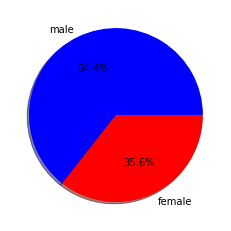

In [22]:
labels = ['male','female']
sizes = titanic.sex.value_counts()
fig1, ax1 = plt.subplots() 
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, colors = ['Blue','Red'])
#ax1.axis('equal')
plt.show()


#2.Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

<Figure size 432x288 with 0 Axes>

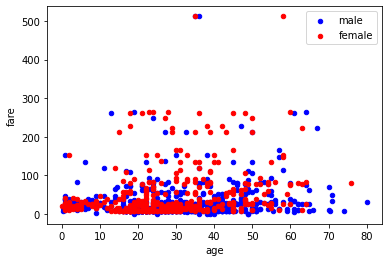

In [40]:
plt.figure()
category1 = titanic[titanic.sex=='male'].plot.scatter('age', 'fare', color='blue',label='male')
titanic[titanic.sex=='female'].plot.scatter('age', 'fare',color='red',label='female',ax=category1)

# Scipy:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1.fitting it to the periodic function
2.plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18
Expected Output:

# 1.fitting it to the periodic function

In [61]:
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18 

months = np.arange(12)

from scipy import optimize

In [66]:
def func(times, avg, ampl, time_offset):

  return (avg+ ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(func, months,Max, [20, 10, 0])

res_min, cov_min = optimize.curve_fit(func, months, Min, [-40, 20, 0])

days = np.linspace(0, 12, num=365)

In [67]:
print(res_max)

[ 39.88861734 -10.59083166   1.33370154]


In [68]:
print(res_min)

[25.55626462 -7.74472962  0.93101294]


# 2.plot the fit

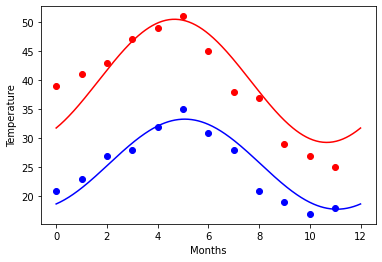

In [73]:
plt.figure()
plt.plot(months,Max, 'ro')
plt.plot(days, func(days, *res_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(days, func(days, *res_min), 'b-')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.show()